In [1]:
import pandas as pd
data = pd.read_csv('feature-envy-2020+2019+2018.csv')

In [2]:
data.head()

,username,project,package,complextype,method,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,...,number_not_final_not_static_methods,number_standard_design_methods,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy
0,2020_Team1,jasml-0.10,com.jasml.decompiler,SourceCodeBuilder,com.jasml.decompiler.SourceCodeBuilder::toStri...,1,0,7,4,0,...,30,29,0,2,0,2,0,0,0,True
1,2020_Team1,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0,0,3,1,0,...,10,9,0,1,0,3,0,0,0,False
2,2020_Team1,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0,0,3,1,0,...,10,9,0,1,0,3,0,0,0,False
3,2020_Team2,jasml-0.10,com.jasml.decompiler,SourceCodeBuilder,com.jasml.decompiler.SourceCodeBuilder::toStri...,1,0,7,4,0,...,30,29,0,2,0,2,0,0,0,True
4,2020_Team2,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0,0,3,1,0,...,10,9,0,1,0,3,0,0,0,False


In [3]:
data = data[['ATFD_method', 'LAA_method','is_feature_envy']]

In [4]:
data.head()

,ATFD_method,LAA_method,is_feature_envy
0,7,0.125,True
1,3,0.400,False
2,3,0.400,False
3,7,0.125,True
4,3,0.400,False


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['is_feature_envy'] = encoder.fit_transform(data['is_feature_envy'])

In [6]:
data

,ATFD_method,LAA_method,is_feature_envy
0,7,0.125,1
1,3,0.400,0
2,3,0.400,0
3,7,0.125,1
4,3,0.400,0
...,...,...,...
325,3,0.400,1
326,3,0.400,1
327,7,0.125,0
328,3,0.400,0


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [8]:



X = data[['ATFD_method', 'LAA_method']]
y = data ['is_feature_envy']

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [12]:


model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(25, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 2, 50)          │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 25)             │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,526 (17.68 KB)

 Trainable params: 4,526 (17.68 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:

# X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [16]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4541 - loss: 0.7208 - val_accuracy: 0.5283 - val_loss: 0.6908
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4396 - loss: 0.7047 - val_accuracy: 0.6415 - val_loss: 0.6899
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5391 - loss: 0.6849 - val_accuracy: 0.4717 - val_loss: 0.6913
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5606 - loss: 0.6791 - val_accuracy: 0.4717 - val_loss: 0.6926
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6063 - loss: 0.6841 - val_accuracy: 0.4717 - val_loss: 0.6931
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5943 - loss: 0.6773 - val_accuracy: 0.4717 - val_loss: 0.6934
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6049 - loss: 0.6692 - val_accuracy: 0.4717 - val_loss: 0.6937
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5972 - loss: 0.6740 - val_accuracy: 0.4717 - val_loss: 0.6937
Epoch 9

In [17]:
training_loss, training_accuracy = model.evaluate(X_train_scaled, y_train)

print(f'Training Loss: {training_loss}')
print(f'Training Accuracy: {training_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5806 - loss: 0.6768
Training Loss: 0.6771710515022278
Training Accuracy: 0.5681818127632141


In [18]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6463 - loss: 0.6755 
Test Loss: 0.6761780381202698
Test Accuracy: 0.6363636255264282


In [19]:
import matplotlib.pyplot as plt
#pip install matplotlib

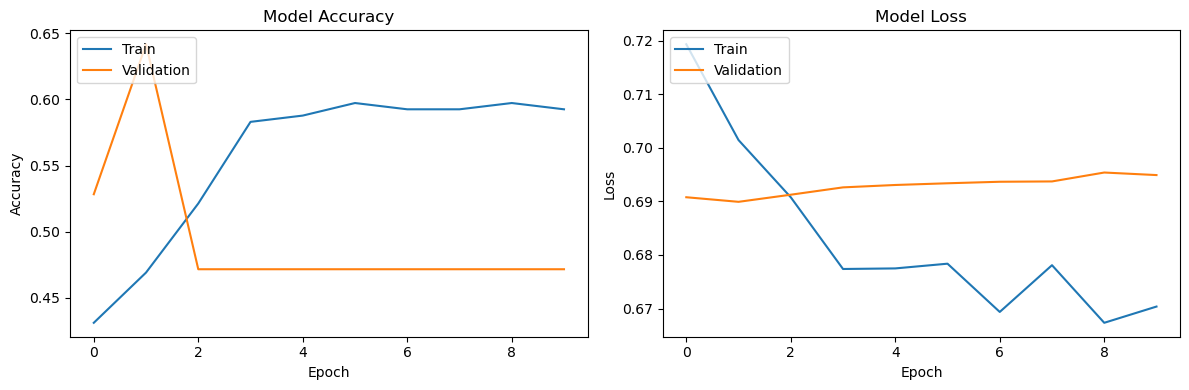

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Another Approach

In [21]:

from keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

In [22]:

model = Sequential([
    Bidirectional(SimpleRNN(64, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Bidirectional(SimpleRNN(32, activation='relu')),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 2, 128)         │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,817 (73.50 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5640 - loss: 0.6849 - val_accuracy: 0.4717 - val_loss: 0.6998
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5526 - loss: 0.7108 - val_accuracy: 0.4717 - val_loss: 0.7066
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5543 - loss: 0.6983 - val_accuracy: 0.4717 - val_loss: 0.6976
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5478 - loss: 0.7023 - val_accuracy: 0.4717 - val_loss: 0.6984
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5583 - loss: 0.6969 - val_accuracy: 0.4717 - val_loss: 0.7002
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5870 - loss: 0.6845 - val_accuracy: 0.4717 - val_loss: 0.6997
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5277 - loss: 0.7036 - val_accuracy: 0.4717 - val_loss: 0.7036
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5171 - loss: 0.7213 - val_accuracy: 0.4717 - val_loss: 0.7064
Epoch 9

In [25]:
training_loss, training_accuracy = model.evaluate(X_train, y_train)

print(f'Training Loss: {training_loss}')
print(f'Training Accuracy: {training_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.5806 - loss: 0.6765
Training Loss: 0.6793021559715271
Training Accuracy: 0.5681818127632141


In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6463 - loss: 0.6629 
Test Loss: 0.665440559387207
Test Accuracy: 0.6363636255264282


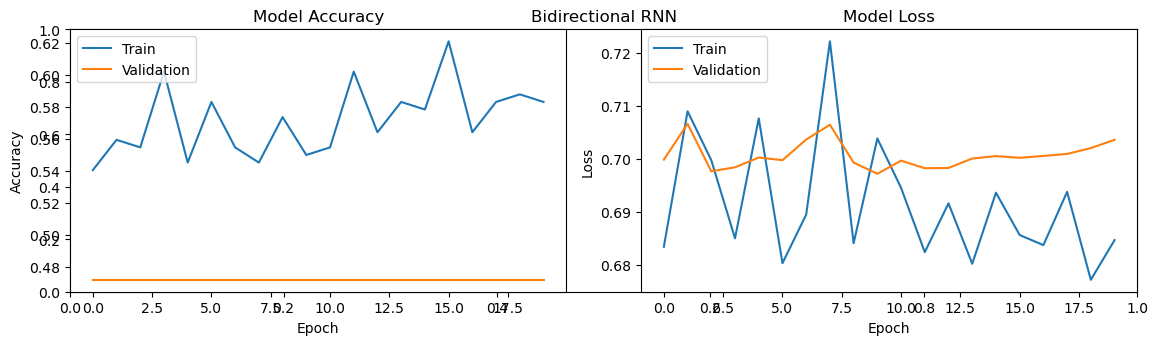

In [27]:
plt.figure(figsize=(12, 4))
plt.title('Bidirectional RNN')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [28]:
# import joblib
# model.save('FeatureEnvyRNN.h5')
# joblib.dump(scaler, 'FeScalerR.pkl')

In [29]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Recall: 1.0
Precision: 0.6363636363636364
F1 Score: 0.7777777777777778


In [30]:
import joblib
from tensorflow.keras.models import save_model

save_model(model, 'FeatureEnvyRNN.keras')
joblib.dump(scaler, 'FeScalerRNN.pkl')


['FeScalerRNN.pkl']